Importing necessary libraryies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np


Loading the CPI data and the lego data set

In [2]:
# lego_data = pd.read_csv('lego_sets.csv')
lego_data_year = pd.read_csv('sets.csv')
cpi_data = pd.read_excel('Consumer Price Index for All Urban Consumers (CPI-U).xlsx')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Cleaning CPI Data

In [3]:
cpi_data.head()

,Consumer Price Index for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Original Data Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,CUUR0000SA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series Title:,"All items in U.S. city average, all urban cons...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Top 10 rows data and the last two column are unnecessary, so we set the data to starting from the 10th row, and discard the last two column

In [4]:
#only row 10 and onward contains the CPI data
cpi_data=cpi_data[10:]
cpi_data

,Consumer Price Index for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
10,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
11,1975,52.1,52.5,52.7,52.9,53.2,53.6,54.2,54.3,54.6,54.9,55.3,55.5,NaN,NaN
12,1976,55.6,55.8,55.9,56.1,56.5,56.8,57.1,57.4,57.6,57.9,58,58.2,NaN,NaN
13,1977,58.5,59.1,59.5,60,60.3,60.7,61,61.2,61.4,61.6,61.9,62.1,NaN,NaN
14,1978,62.5,62.9,63.4,63.9,64.5,65.2,65.7,66,66.5,67.1,67.4,67.7,NaN,NaN
15,1979,68.3,69.1,69.8,70.6,71.5,72.3,73.1,73.8,74.6,75.2,75.9,76.7,NaN,NaN
16,1980,77.8,78.9,80.1,81,81.8,82.7,82.7,83.3,84,84.8,85.5,86.3,NaN,NaN
17,1981,87,87.9,88.5,89.1,89.8,90.6,91.6,92.3,93.2,93.4,93.7,94,NaN,NaN
18,1982,94.3,94.6,94.5,94.9,95.8,97,97.5,97.7,97.9,98.2,98,97.6,NaN,NaN
19,1983,97.8,97.9,97.9,98.6,99.2,99.5,99.9,100.2,100.7,101,101.2,101.3,NaN,NaN


In [5]:
#Drop the unnecessary HALF1 and HALF2 Column
cpi_data.rename(columns = cpi_data.iloc[0], inplace = True)
cpi_data=cpi_data.drop(index=10) #drop the 1st row after replace it with the unnamed column named
cpi_data.drop(['HALF1', 'HALF2'], axis = 1, inplace = True)

In [6]:
cpi_data.isna().sum()

Year    0
Jan     0
Feb     0
Mar     0
Apr     0
May     0
Jun     0
Jul     0
Aug     0
Sep     0
Oct     0
Nov     0
Dec     1
dtype: int64

All data are fills except for the last row, last column. This data is taken at 2023, December. NaN for this cell make sense. For now we replace this data with the previous month data. 

In [7]:
cpi_missing = pd.concat([cpi_data.isnull().sum(), 100 * cpi_data.isnull().mean()], axis=1)
cpi_missing 

cpi_data['Dec'][59] = cpi_data['Nov'][59]

In [8]:
cpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 11 to 59
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    49 non-null     object
 1   Jan     49 non-null     object
 2   Feb     49 non-null     object
 3   Mar     49 non-null     object
 4   Apr     49 non-null     object
 5   May     49 non-null     object
 6   Jun     49 non-null     object
 7   Jul     49 non-null     object
 8   Aug     49 non-null     object
 9   Sep     49 non-null     object
 10  Oct     49 non-null     object
 11  Nov     49 non-null     object
 12  Dec     49 non-null     object
dtypes: object(13)
memory usage: 5.1+ KB


The year data type is object, we convert the year to type int


In [9]:
cpi_data.index = cpi_data.index.astype('int')
cpi_data.index

RangeIndex(start=11, stop=60, step=1)

/var/folders/5g/q6jfbkkj3rz2mb5hlkd06mkh0000gq/T/ipykernel_69460/2706645622.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks)


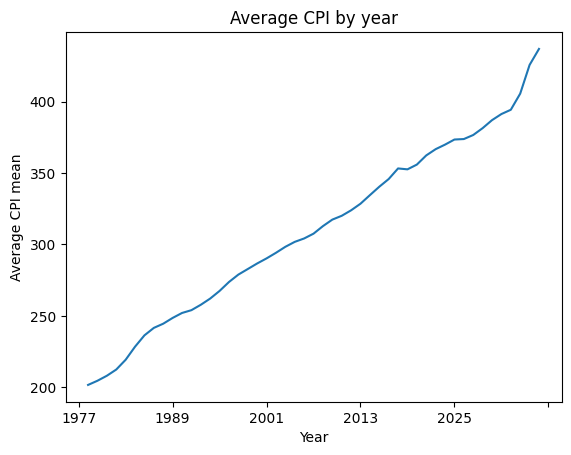

In [10]:
cpi_data_mean = cpi_data.T.mean()
ax = cpi_data_mean.plot()
x_ticks = np.arange(1965, 2027, 12)
ax.set_xticklabels(x_ticks)
plt.xlabel('Year')
plt.ylabel('Average CPI mean')
plt.title('Average CPI by year')
plt.show()

Cleaning Lego Data

In [11]:
lego_data_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14936 entries, 0 to 14935
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Set_ID            14936 non-null  object 
 1   Name              14936 non-null  object 
 2   Year              14936 non-null  int64  
 3   Theme             14936 non-null  object 
 4   Theme_Group       14915 non-null  object 
 5   Subtheme          11495 non-null  object 
 6   Category          14936 non-null  object 
 7   Packaging         14936 non-null  object 
 8   Num_Instructions  14936 non-null  int64  
 9   Availability      14936 non-null  object 
 10  Pieces            13133 non-null  float64
 11  Minifigures       7686 non-null   float64
 12  Owned             14771 non-null  float64
 13  Rating            14936 non-null  float64
 14  USD_MSRP          5837 non-null   float64
 15  Total_Quantity    12276 non-null  float64
 16  Current_Price     5442 non-null   float6

In [12]:
lego_data_year.isna().sum()

Set_ID                 0
Name                   0
Year                   0
Theme                  0
Theme_Group           21
Subtheme            3441
Category               0
Packaging              0
Num_Instructions       0
Availability           0
Pieces              1803
Minifigures         7250
Owned                165
Rating                 0
USD_MSRP            9099
Total_Quantity      2660
Current_Price       9494
dtype: int64

In [13]:
lego_data_year.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


In [14]:
#covert the themes to type string 
lego_data_year.columns = lego_data_year.columns.astype('string')
print(lego_data_year.columns.dtype)

string


In [15]:
lego_data_year['Theme'].value_counts()


Theme
Duplo                      1278
Gear                       1232
Collectable Minifigures     804
City                        770
Star Wars                   723
                           ... 
Life of George                2
Boost                         1
Collectable minifigures       1
Stranger Things               1
Educational                   1
Name: count, Length: 155, dtype: int64

Average price of lego each year

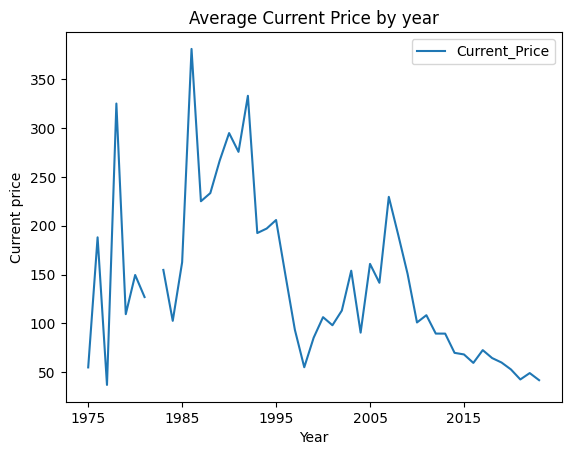

In [16]:
lego_data_year.groupby(lego_data_year['Year'])['Current_Price'].mean().plot();
plt.ylabel('Current price')
plt.xticks(range(1975, 2023, 10),)
plt.legend()
plt.title('Average Current Price by year')
plt.show()

Taking the average of the current price will handle the large missing data of Current Price prior the year 1990

Text(0.5, 1.0, 'average MSRP(in USD) by Year')

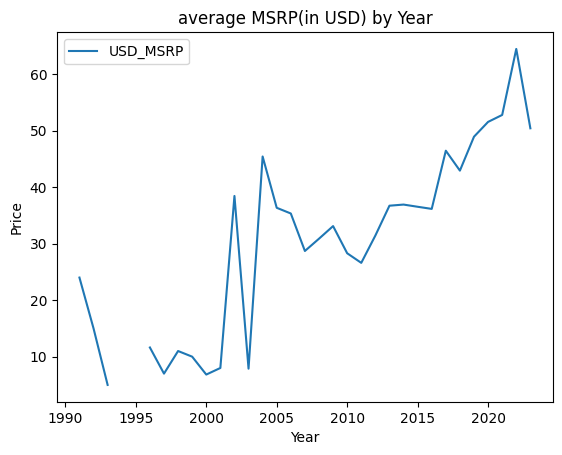

In [17]:
lego_data_year.groupby(lego_data_year['Year'])['USD_MSRP'].mean().plot();
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('average MSRP(in USD) by Year')

In [18]:
lego_data_year.groupby(lego_data_year['Year'])['Current_Price'].count()

Year
1975      1
1976      3
1977      3
1978      2
1979      3
1980     10
1981      2
1982      0
1983      8
1984      2
1985     12
1986     16
1987     20
1988      7
1989     25
1990     14
1991     21
1992     22
1993     22
1994     26
1995     27
1996     33
1997     53
1998     57
1999     82
2000     74
2001     90
2002    101
2003    101
2004     76
2005     90
2006     80
2007     96
2008    121
2009    159
2010    173
2011    200
2012    217
2013    251
2014    302
2015    329
2016    316
2017    350
2018    345
2019    376
2020    352
2021    347
2022    311
2023    114
Name: Current_Price, dtype: int64

In [19]:
lego_data_year.groupby(lego_data_year['Year'])['USD_MSRP'].count()

Year
1975      0
1976      0
1977      0
1978      0
1979      0
1980      0
1981      0
1982      0
1983      0
1984      0
1985      0
1986      0
1987      0
1988      0
1989      0
1990      0
1991      4
1992      1
1993      2
1994      0
1995      0
1996      4
1997      1
1998      2
1999      1
2000     12
2001      6
2002      9
2003      4
2004      7
2005     43
2006    138
2007    299
2008    279
2009    318
2010    340
2011    389
2012    301
2013    329
2014    324
2015    359
2016    323
2017    338
2018    345
2019    340
2020    337
2021    327
2022    361
2023    294
Name: USD_MSRP, dtype: int64

USD_MSRP(manufacturer's suggested retail price), and the Current price has low amount of data before 2000. It would be more reasonable to look at the data after 2005s. 

In [20]:
# lego_data_year['Current_Price'] = lego_data_year['Current_Price'].fillna(method='backfill')
# lego_data_year['USD_MSRP'] = lego_data_year['USD_MSRP'].fillna(method='backfill')
# #fill the gap with the later validated data

Merging CPI mean data and lego price data

In [21]:
lego_data_year['average_current_price'] = lego_data_year.groupby(lego_data_year.index)['Current_Price'].mean()
print(lego_data_year['average_current_price'])
lego_data_year['average_MSRP'] = lego_data_year.groupby(lego_data_year.index)['USD_MSRP'].mean()
print(lego_data_year['average_MSRP'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
14931   NaN
14932   NaN
14933   NaN
14934   NaN
14935   NaN
Name: average_current_price, Length: 14936, dtype: float64
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
14931    5.99
14932    5.99
14933    5.99
14934    5.99
14935    5.99
Name: average_MSRP, Length: 14936, dtype: float64


In [22]:
newcpi_df = pd.DataFrame({'Year': cpi_data['Year'], 'CPI Mean': cpi_data_mean})


In [23]:
merged_df = lego_data_year.merge(newcpi_df, left_on='Year',right_on='Year', how='inner')
CPI_LegoPrice = merged_df[['Theme', 'Theme_Group', 'average_MSRP', 'average_current_price', 'CPI Mean' ]]
merged_df

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price,average_current_price,average_MSRP,CPI Mean
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN,NaN,NaN,201.6
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN,NaN,NaN,201.6
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN,NaN,NaN,201.6
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN,NaN,NaN,201.6
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN,NaN,NaN,201.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14931,854242-1,Creeper Key Chain,2023,Gear,Miscellaneous,Key Chains/Minecraft,Gear,Tag,0,LEGO exclusive,NaN,NaN,2.0,0.0,5.99,NaN,NaN,NaN,5.99,436.901846
14932,854243-1,Steve Key Chain,2023,Gear,Miscellaneous,Key Chains/Minecraft,Gear,Tag,0,LEGO exclusive,NaN,NaN,2.0,0.0,5.99,NaN,NaN,NaN,5.99,436.901846
14933,854244-1,Piglin Key Chain,2023,Gear,Miscellaneous,Key Chains/Minecraft,Gear,Tag,0,LEGO exclusive,NaN,NaN,2.0,0.0,5.99,NaN,NaN,NaN,5.99,436.901846
14934,854245-1,Fennec Shand Key Chain,2023,Gear,Miscellaneous,Key Chains/Star Wars,Gear,Tag,0,LEGO exclusive,NaN,NaN,88.0,0.0,5.99,NaN,NaN,NaN,5.99,436.901846


Text(0, 0.5, 'Average current price')

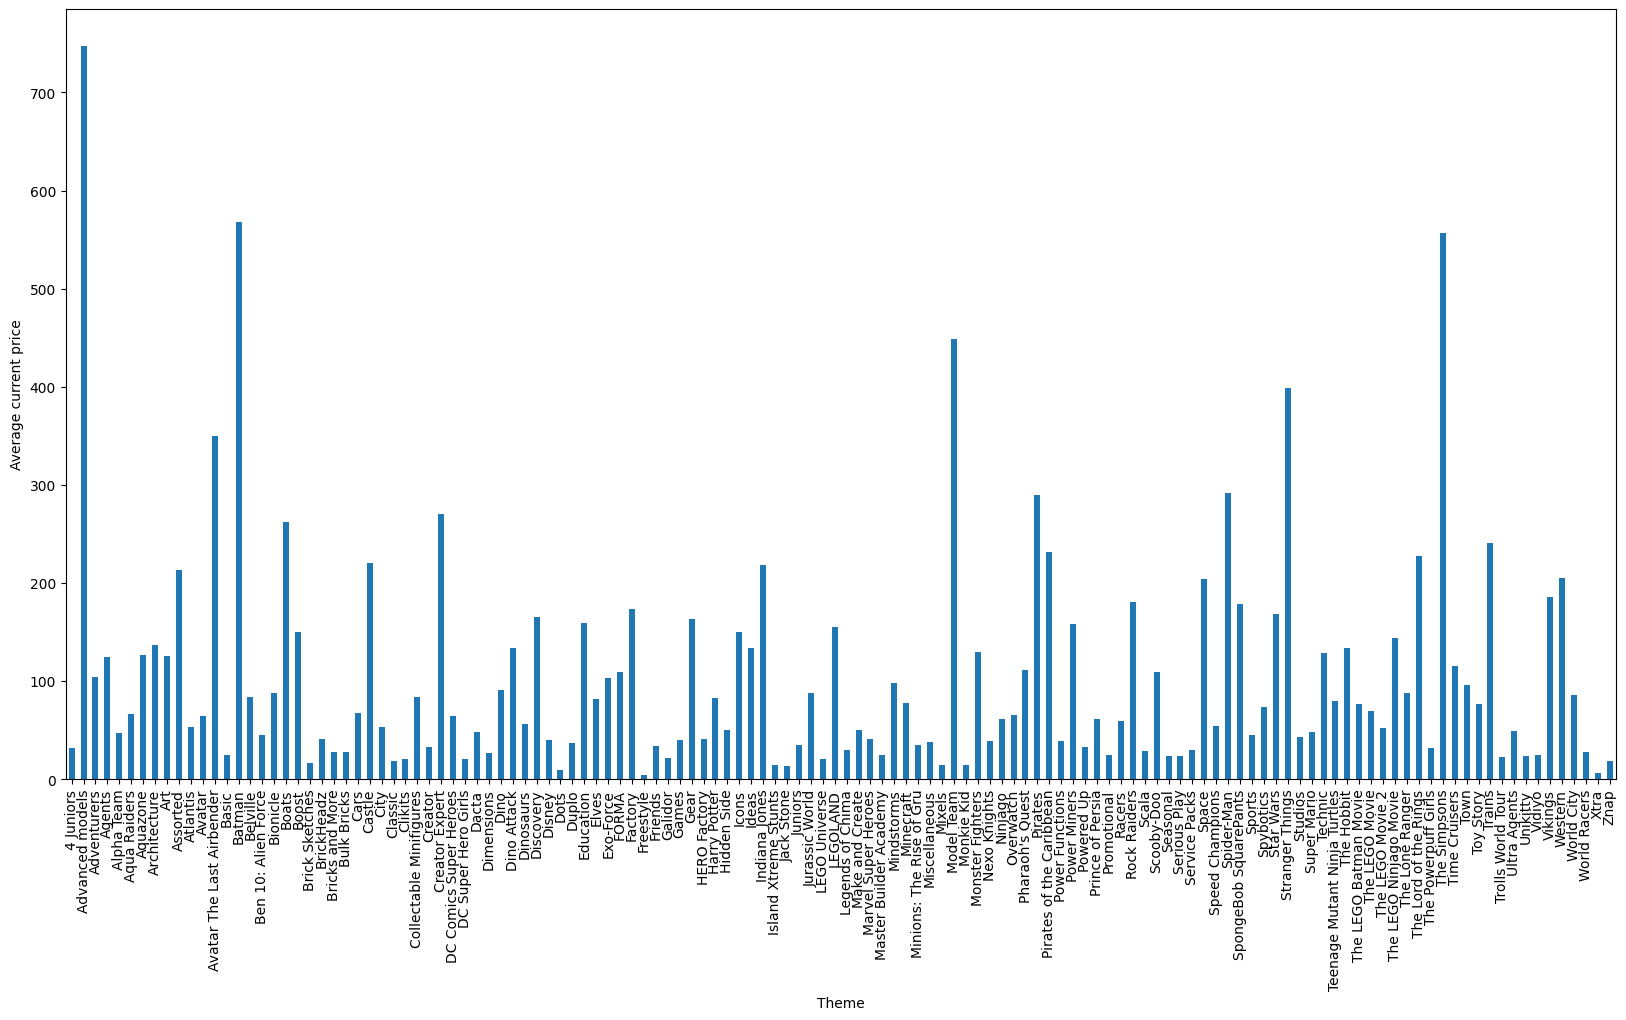

In [24]:
average_current_price_by_theme = merged_df.groupby('Theme')['Current_Price'].mean()
for theme in average_current_price_by_theme.index:
    if math.isnan(average_current_price_by_theme[theme]):
        average_current_price_by_theme.drop(theme, inplace=True)# Plot the average current price by theme
average_current_price_by_theme.plot(kind='bar', figsize=(20,10));
plt.ylabel("Average current price")

Plotting the average current price of the lego, and the average of CPI 

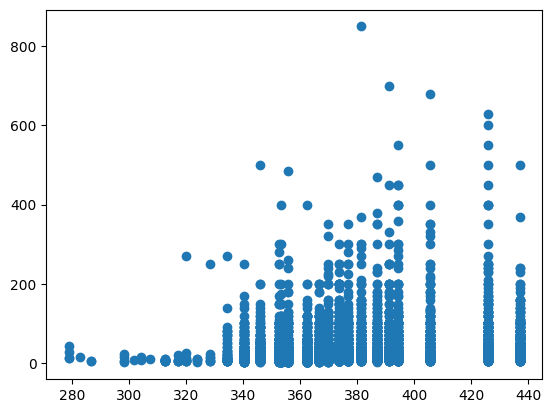

In [25]:
plt.scatter(x=merged_df['CPI Mean'],y = merged_df['average_MSRP']);

In [26]:
complete_lego_price = pd.read_csv('complete_lego_price.csv')
complete_lego_price.drop(columns='Unnamed: 0', inplace= True)
print(complete_lego_price[complete_lego_price['Number']=='854242-1'])
print()
print(merged_df[merged_df['Set_ID'] =='854242-1'])

         Number Theme              Subtheme  Year           Set name  \
11657  854242-1  Gear  Key Chains/Minecraft  2023  Creeper Key Chain   

       Minifigs  Pieces  RRP (USD)  Value new (USD)  Value used (USD)  \
11657       NaN     NaN       5.99              NaN               NaN   

      Launch date Exit date  
11657         NaN       NaN  

         Set_ID               Name  Year Theme    Theme_Group  \
14931  854242-1  Creeper Key Chain  2023  Gear  Miscellaneous   

                   Subtheme Category Packaging  Num_Instructions  \
14931  Key Chains/Minecraft     Gear       Tag                 0   

         Availability  Pieces  Minifigures  Owned  Rating  USD_MSRP  \
14931  LEGO exclusive     NaN          NaN    2.0     0.0      5.99   

       Total_Quantity  Current_Price  average_current_price  average_MSRP  \
14931             NaN            NaN                    NaN          5.99   

         CPI Mean  
14931  436.901846  


In [27]:
print(merged_df.info())
print(complete_lego_price.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14936 entries, 0 to 14935
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Set_ID                 14936 non-null  object 
 1   Name                   14936 non-null  object 
 2   Year                   14936 non-null  object 
 3   Theme                  14936 non-null  object 
 4   Theme_Group            14915 non-null  object 
 5   Subtheme               11495 non-null  object 
 6   Category               14936 non-null  object 
 7   Packaging              14936 non-null  object 
 8   Num_Instructions       14936 non-null  int64  
 9   Availability           14936 non-null  object 
 10  Pieces                 13133 non-null  float64
 11  Minifigures            7686 non-null   float64
 12  Owned                  14771 non-null  float64
 13  Rating                 14936 non-null  float64
 14  USD_MSRP               5837 non-null   float64
 15  To

Based on the output above, the RRP corresponds to the USD_MSRP of the new

Text(0, 0.5, 'Recommended retail price ')

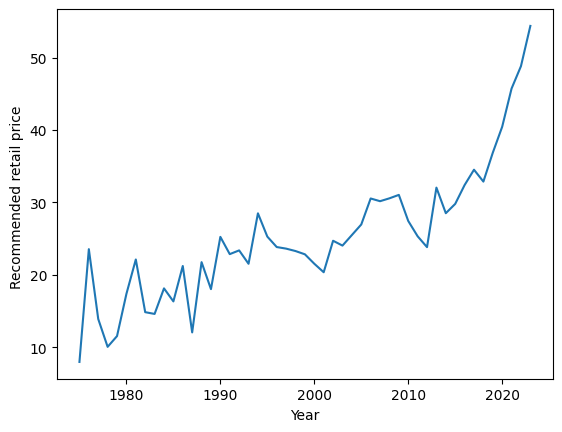

In [28]:
year = complete_lego_price['Year'].unique()
plt.plot(year, complete_lego_price.groupby('Year')['RRP (USD)'].mean())
plt.xlabel('Year')
plt.ylabel('Recommended retail price ')

In [29]:
merged_df = complete_lego_price.merge(newcpi_df, left_on='Year',right_on='Year', how='inner')
print(merged_df)

                    Number     Theme            Subtheme  Year  \
0                    222-1     Books                LEGO  1975   
1                    615-2  LEGOLAND             Vehicle  1975   
2                     10-2     Basic                 NaN  1976   
3                    555-1  LEGOLAND                 NaN  1976   
4                    697-1  LEGOLAND                 NaN  1976   
...                    ...       ...                 ...   ...   
11741  ISBN9780241610589-1     Books  Dorling Kindersley  2023   
11742  ISBN9780241621424-1     Books  Dorling Kindersley  2023   
11743  ISBN9780744081756-1     Books  Dorling Kindersley  2023   
11744  ISBN9780744084641-1     Books  Dorling Kindersley  2023   
11745  ISBN9781506725185-1     Books          Dark Horse  2023   

                                                Set name  Minifigs  Pieces  \
0                                    Building Ideas Book       NaN     1.0   
1                                               For

1975 data is too little, so we drop th3 first two row.

In [30]:
merged_df.drop([0, 1], inplace= True)
print(merged_df)

                    Number     Theme            Subtheme  Year  \
2                     10-2     Basic                 NaN  1976   
3                    555-1  LEGOLAND                 NaN  1976   
4                    697-1  LEGOLAND                 NaN  1976   
5                   1011-1     Dacta                 NaN  1976   
6                   1017-1     Dacta                 NaN  1976   
...                    ...       ...                 ...   ...   
11741  ISBN9780241610589-1     Books  Dorling Kindersley  2023   
11742  ISBN9780241621424-1     Books  Dorling Kindersley  2023   
11743  ISBN9780744081756-1     Books  Dorling Kindersley  2023   
11744  ISBN9780744084641-1     Books  Dorling Kindersley  2023   
11745  ISBN9781506725185-1     Books          Dark Horse  2023   

                                                Set name  Minifigs  Pieces  \
2                                 Basic Building Set, 3+       NaN   152.0   
3                                               Hos

In [31]:
print(merged_df['Launch date'].count())
print(merged_df['Minifigs'].count())
print(merged_df['Value used (USD)'].count())
print(merged_df['Pieces'].count())

6621
6492
8367
9652


In [32]:
merged_df.isna().sum()

Number                 0
Theme                  0
Subtheme            1877
Year                   0
Set name               0
Minifigs            5252
Pieces              2092
RRP (USD)              0
Value new (USD)     2607
Value used (USD)    3377
Launch date         5123
Exit date           5123
CPI Mean               0
dtype: int64

In [33]:
#The amount of missing values in Launch date, MiniFigs, and value used are over half the values, we drop them. 
merged_df.drop(columns=['Launch date', 'Exit date', 'Minifigs'], inplace=True)
merged_df.columns

Index(['Number', 'Theme', 'Subtheme', 'Year', 'Set name', 'Pieces',
       'RRP (USD)', 'Value new (USD)', 'Value used (USD)', 'CPI Mean'],
      dtype='object')

In [34]:
merged_df['Subtheme'].fillna(merged_df['Theme'], inplace= True)

In [35]:
merged_df.isna().sum()

Number                 0
Theme                  0
Subtheme               0
Year                   0
Set name               0
Pieces              2092
RRP (USD)              0
Value new (USD)     2607
Value used (USD)    3377
CPI Mean               0
dtype: int64

In [36]:
merged_df['Value new (USD)'].fillna(merged_df['Value new (USD)'].median(), inplace = True)
merged_df['Value used (USD)'].fillna(merged_df['Value used (USD)'].median(), inplace = True)
merged_df['Pieces'].fillna(merged_df['Pieces'].median(), inplace = True)


In [37]:
merged_df.isna().sum()

Number              0
Theme               0
Subtheme            0
Year                0
Set name            0
Pieces              0
RRP (USD)           0
Value new (USD)     0
Value used (USD)    0
CPI Mean            0
dtype: int64

In [38]:
merged_df.to_csv('complete_lego_price_CPI.csv')